In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.compose import ColumnTransformer
%matplotlib inline

In [2]:
companies = pd.read_csv("E:\MachineLearning\\1LinearRegressionClass\\1000_Companies.csv")
x = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values
companies.head()
# x

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\kumar\AppData\Local\Temp\ipykernel_20116\3431710950.py:1: SyntaxWarning: invalid escape sequence '\M'
  companies = pd.read_csv("E:\MachineLearning\\1LinearRegressionClass\\1000_Companies.csv")


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
company= companies.drop("State",axis=1)
company.head()

# companies= companies.drop("State",axis=1)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<Axes: >

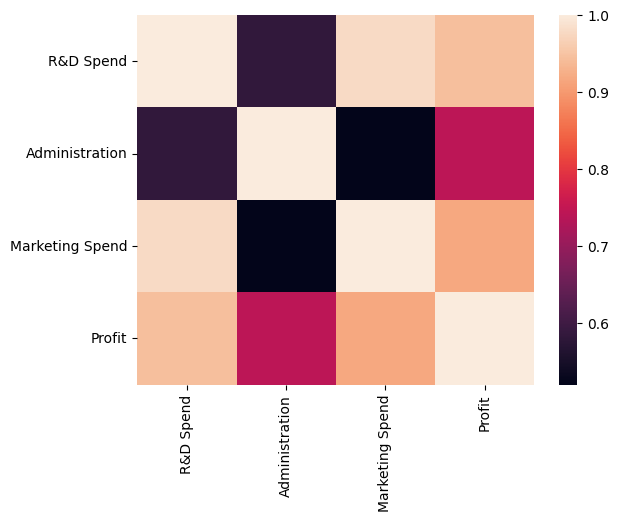

In [4]:
sns.heatmap(company.corr())

In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:,3])
# onehotencoder = OneHotEncoder(categorical_features = [3])
ct = ColumnTransformer([('myAks', OneHotEncoder(), [0])], remainder='passthrough')

X = ct.fit_transform(x).toarray()


# This part of the code only does the transformation of the state column which has strings as values and to convert into the numericals values such
# suppose new york is 0 , california is 1 etc

0                                                                                                                                

NameError: name 'x' is not defined

In [ ]:
# Avoiding the dummy variable trap 
# X = X[:,1:]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(x_test)
y_pred

array([ 91100.01773138,  89842.90888804,  95805.67075317, 171329.70505622,
        86326.72818928, 111366.84704079, 161912.49695499,  92651.42753254,
       161174.93513272,  58430.42245971,  70042.4574341 , 148175.64492102,
       125326.76118764,  63024.32548142, 171975.85926178,  78863.18913912,
       118380.03175749, 160046.37994797, 198489.35765743, 177283.17383021,
       148861.23703494,  87301.00196779, 176226.8121102 ,  85895.16030507,
       105127.57923607, 101649.76278603,  66982.31958939,  61867.30050248,
        71836.74486094, 233748.83780901, 120713.07990891, 111322.14261744,
       102991.92374864, 136552.33362669,  67294.85592785, 108678.97062635,
       180920.79854873, 167422.30395729, 170374.01748475, 117848.39089851,
        98606.67908824, 160855.70798031, 107633.88523279,  55638.51766202,
       116781.15397114,  62374.01499192, 155412.92039092,  81772.77197722,
       156621.77006024, 130263.62546376, 179811.43114376, 170341.58121738,
        94746.34506726,  

In [10]:
print(regressor.coef_)

[-4.73722238e+04  1.22575056e+05  8.55804024e-06 -5.43098917e+03
 -5.42757866e+03 -7.27662758e+04 -5.40452555e+03  1.36004201e-05
 -4.89870951e+03 -4.89801493e+03 -5.34332403e+03 -5.10986910e+03
 -5.10911116e+03 -5.33833449e+03 -4.87344593e+03 -5.31262859e+03
  3.32430773e-07 -4.83075007e+03 -5.28199628e+03 -5.27170134e+03
 -5.03590943e+03 -4.80030735e+03 -4.78874901e+03  6.34735625e-06
 -4.77024338e+03 -5.20127868e+03 -5.19774168e+03 -5.18517291e+03
 -9.08870152e-06 -4.70241018e+03 -4.90403276e+03 -4.89967471e+03
 -4.89329573e+03 -5.12239259e+03 -5.11828725e+03 -5.07154916e+03
 -4.83664167e+03 -5.06719131e+03 -4.82779949e+03 -4.82009401e+03
 -5.04975923e+03 -5.02045321e+03 -5.01912691e+03 -5.00952679e+03
 -5.00504247e+03 -4.51836377e+03  6.60056685e-08 -4.47131005e+03
 -4.47036272e+03 -4.93430396e+03 -4.46562569e+03 -1.11798727e-07
 -4.45533074e+03 -4.44970951e+03 -4.44408848e+03 -4.89962942e+03
 -4.65240588e+03 -4.64665838e+03 -5.03812771e-07 -3.74762749e-07
 -4.36747602e+03 -4.36425

In [11]:
print(regressor.intercept_)

-196991.88452220778


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9346622259107558